<a href="https://colab.research.google.com/github/katiko89/Educational-projects/blob/main/%D0%9B%D0%A0_2%2C_%D0%9C%D0%B0%D1%80%D0%BA%D0%B8%D0%BD%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Программирование на языке Python.

Преподаватель: Горохов Олег Евгеньевич.

e-mail: gorokhov-oe@cs.msu.ru




# Лабораторная работа № 2. Кластеризация.

## 0. Теория

Кластеризация - пример задачи **обучения без учителя**.

В этой задаче, в отличие от классификации и регрессии, нет какого-то заранее известного значения целевой переменной на данных обучающей выборки.

Здесь мы работаем с выборкой признаков, для которых не известны значения целевой переменной. Наша цель - проанализировать исходную выборку, определив некоторые внутренние зависимости в данных. Поэтому данная задача и называется задачей обучения без учителя, т.к. у нас нет никакой разметки исходных данных.

В случае задачи кластеризации мы пытаемся объединить исходные данные в некоторые группы, которые называются кластерами.

Отличительным признаком кластера можно считать следующее утверждение:

"Среднее расстояние между объектами кластера существенно меньше, чем среднее расстояние между парами объектов, один из которых принадлежит кластеру, а другой - нет".

Поставим эту задачу формально.
_____________________________________
**Дано:**

Пусть $X$ - это пространство объектов, из которых мы набираем обучающую выборку.

$X^N$ = $\{x^i\}_{i=1}^N$- обучающая выборка. Еще раз обратим внимание на то, что в выборке отсутствуют метки $y$.

$\rho: X × X → [0,∞)$ - функция расстояния между объектами.

Заметим, что функция расстояния, как и в случае с метрическими алгоритмами, отражает наши ожидания от понятия "близость объектов".

**Найти:**

$y_i \in Y$ - метки принадлежности кластерам объектов. Требования к ним:

* Каждый кластер состоит из близких объектов.
* Объекты разных кластеров далеки друг от друга.

Очевидно, что для решения задачи кластеризации можно использовать различные метрики расстояния. Какую метрику использовать - зависит от конкретной задачи.

### K-Means

Самый простой алгоритм кластеризации - алгоритм K-Means. Его можно описать следующим образом.

В качестве предположения будем считать, что число кластеров в имеющемся датасете нам заранее известно и равно оно $K$.

Заметим, что искомые кластеры можно однозначно задать в виде $K$ точек в пространстве признаков.
> Зададимся начальным приближением центров искомых кластеров $\Theta_0 = (\theta_1^0 ... \theta_k^0)$

> Пока не достигнута сходимость:
>> 1.Посчитаем, каким кластерам принадлежат точки имеющегося датасета при условии текущего приближения $G_i$: $g_j^i := \arg\min\limits_{p = 1 ... k}(\rho(Θ_p^{i-1}, x_j))$ для всех $x_j$ из датасета.
>
>> 2. На основе посчитанного распределения датасета по кластерам G = ($g_1^i ... g_N^i $) пересчитаем новые центры кластеров $\Theta_i = (\theta_1^i ... \theta_k^i)$.

**Замечание:** Важно заранее сказать, что мы понимаем под сходимостью. Мы будем понимать под сходимостью ситуацию, при которой каждый следующий шаг приводит к крайне незначительному изменению нашей оценки центров кластеров. В следующем примере мы увидим, что с некоторого шага эта оценка вообще не будет меняться. В реальности во многих алгоритмах мы задаемся некоторым маленьким числом $ϵ$, а затем сравниваем изменение оценок с этим значением. Если оказалось, что изменение оценок из шага в шаг полуается меньше, чем $ϵ$, мы говорим, что достигли сходимости.

**Замечание 2:** На самом деле, задача выбора начального приближения центров кластеров - очень непростая. В частности, от выбора начального приближения может зависеть весь результат работы алгоритма (подумайте, почему).

### DBSCAN

Еще один алгоритм кластеризации, который используется для разделения выборки на 2 кластера. Он ищет наиболее плотное скопление точек исходной выборки, объединяя их в один кластер. Все остальные точки будут принадлежать выбросам (второму кластеру). Этот алгоритм можно использовать для обнаружения выбросов (аномалий) в данных.

### Реализация в sklearn

Зададим случайное множество точек на плоскости и попробуем его визуализировать:

In [ ]:
import numpy as np

a_x = 3.5 * np.random.randn(50) + 7
a_y = 3.5 * np.random.randn(50) + 7
b_x = 3.5 * np.random.randn(50) - 7
b_y = 3.5 * np.random.randn(50) - 7

Мы задали случайным образом 2 группы точек: (a_x, a_y) и (b_x, b_y).

Теперь объединим эти точки в единый вектор признаков с помощью новой функции `zip()`:

In [ ]:
dots_a = list(zip(a_x, a_y))
dots_a

[(9.6045915202235, 11.786388272259805),
 (4.181364634461888, 7.656585282193972),
 (8.523691657489588, 6.800537884837048),
 (11.244977642257027, 7.6272009848863185),
 (3.6515598966587772, 5.667219247259197),
 (9.718958302767994, 3.663205767703937),
 (7.0382100246447, 7.6823617476116235),
 (6.146157008288457, 4.149016389387739),
 (5.776862653692149, 0.9681218657643935),
 (3.657598294676807, 6.321536048612795),
 (4.985528275457732, 10.085827517067028),
 (9.49878017895783, 8.295318162976901),
 (5.833769375424806, 2.934455068003542),
 (7.534056011646305, 4.705399306828136),
 (10.639146978450825, 6.031514339543606),
 (6.225834857147139, 6.344113235312838),
 (6.808410530935394, 3.7765430259892585),
 (5.647021763853271, -0.5171474688650584),
 (11.602698558533866, 2.373971993862641),
 (2.2272538676491713, 6.254822292384068),
 (8.26213140165068, 12.725127345479386),
 (6.6969462198816805, 3.643803224324916),
 (12.51312981920484, 2.5741467847003676),
 (6.240116918094571, 10.280589223778124),
 (7.5

Аналогично объединяем пары для группы b:

In [ ]:
dots_b = list(zip(b_x, b_y))
len(dots_b)

50

Теперь объединим данные в один список:

In [ ]:
dots = dots_a + dots_b
len(dots)

100

Теперь построим график:

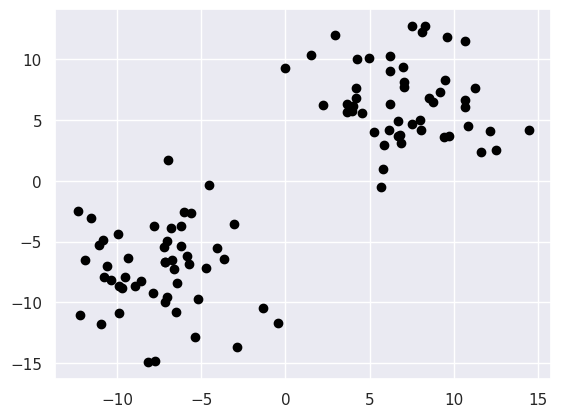

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

sns.set_theme()

x = [elem[0] for elem in dots]
y = [elem[1] for elem in dots]

plt.scatter(x, y, c='black')

Теперь попробуем провести кластеризацию с помощью KMeans:

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(dots)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 2, 2, 0, 2, 0, 2,
       0, 0, 0, 0, 2, 0, 2, 2, 2, 0, 0, 2, 2, 0, 0, 0, 2, 2, 2, 2, 0, 0,
       2, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2], dtype=int32)

Теперь давайте раскрасим точки разными цветами в зависимости от номера кластера (например, точки одного кластера раскрасим красным, точки другого - окрасим в синим, точки третьего - красным):

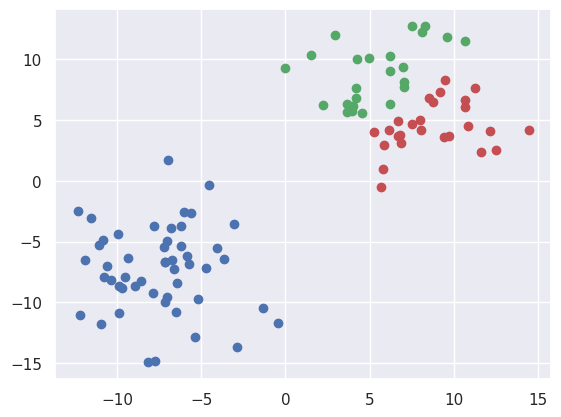

In [ ]:
colors_clusters = ['g', 'b', 'r']
for i,p in enumerate(dots):
  plt.scatter([p[0]], [p[1]], c=colors_clusters[kmeans.labels_[i]])

Посмотрим другой алгоритм кластеризации - DBSCAN. И попробуем с его помощью кластеризовать исходные точки:

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
dbscan = DBSCAN(eps=7).fit(dots)

In [ ]:
dbscan.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

Обратите внимание на параметр eps - это максимальное расстояние между двумя точками кластера, для которого точки считаются соседями друг друга. Это - очень важный параметр. Его нужно подбирать экспериментально. Мы выбрали в качестве eps значение 7.

Данный алгоритм работает только с двумя кластерами, позволяя выделить наиболее плотную группу точек в единый кластер, считая удалённые точки "выбросами". Визуализируем работу алгоритма:

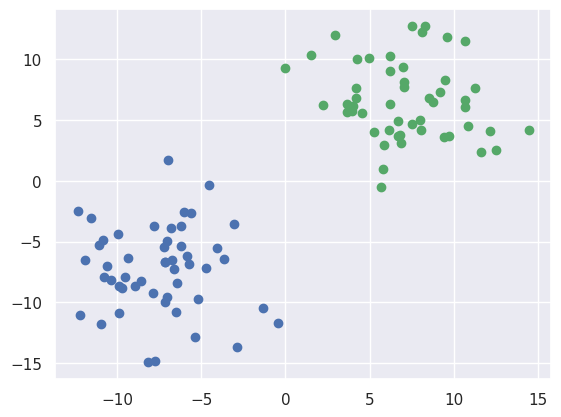

In [ ]:
colors_clusters = ['g', 'b']
for i,p in enumerate(dots):
  plt.scatter([p[0]], [p[1]], c=colors_clusters[dbscan.labels_[i]])

Видим, что и этот алгоритм достаточно хорошо разделил наши данные.

## 1. Задание 1. Кластеризация рукописных цифр.

На прошлых занятиях мы говорили про снижение размерности данных. В частности, визуализировали набор данных MNIST.

В данном задании вам нужно выполнить следующие шаги для этого набора:

1. Загрузить набор данных MNIST (так, как это делалось на лекциях).
2. Провести кластеризацию данного набора (всего, без разделения на тренировочную и тестовую выборку) с помощью KMeans на 10 кластеров. Посчитать метрику [homogenity_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.homogeneity_score.html#sklearn.metrics.homogeneity_score) на основании известных меток классов.
3. Провести кластеризацию, аналогичную пункту 2, но с добавлением StandardScaler (его также можно обучать и применять на всех данных). Посчитать homogenity_score, сравнить с пунктом 2.
4. Провести эксперименты по подбору параметров KMeans (нужно подумать, какие параметры подбирать) и выбрать те параметры, которые дают лучшее значение homogenity_score.

Далее необходимо добавить ячейки с кодом и текстовым описанием всех действий, которые выполняются.

***Вставьте свой код в ячейки ниже***

In [ ]:
from sklearn.datasets import load_digits
mnist=load_digits()

from sklearn.cluster import KMeans

In [ ]:
#отдельно выделим выборку без меток и метки
X=mnist.data
y=mnist.target

Теперь проаедём кластеризацию с помощью KMeans

In [ ]:
kmeans=KMeans(n_clusters=10, random_state=0).fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Проcчитаем метрику homogenity_score на основании известных меток классов.

In [ ]:
from sklearn.metrics import homogeneity_score

score_1=homogeneity_score(y, kmeans.labels_)
print(score_1)

0.7423769268336259




---
Теперь проделаем тоже самое, но предварительно стандатизируем данные


In [ ]:
#стандартизуем данные
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(X)

kmeans_st=KMeans(n_clusters=10, random_state=0).fit(standardized_data)
score_2=homogeneity_score(y, kmeans_st.labels_)

print(score_2)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.6017212608396242


Получилось хуже... Давайте теперь подберём параметры, дающие наилучшее homogenity_score

In [ ]:
searching={}
for init in ['k-means++', 'random']:
  for n_init in [1, 10, 12, 15]:
    for max_iter in [50, 100, 200, 300]:
      for random_state in [None, 0, 42]:
        for algorithm in ['lloyd', 'elkan']:
          kmeans=KMeans(n_clusters=10, init=init, n_init=n_init, max_iter=max_iter, algorithm=algorithm, random_state=random_state).fit(X)
          score=homogeneity_score(y, kmeans.labels_)
          searching[f'init={init}, n_init={n_init}, max_iter={max_iter}, algorithm={algorithm}, random_state={random_state}']=score


best_param=max(searching, key=searching.get)
print(best_param, searching[best_param])

init=k-means++, n_init=1, max_iter=200, algorithm=elkan, random_state=None 0.7811778772006154


Я честно проверяла, что будет, если не давать random_state=None, там результат хуже. При random_state=None чаще всего выдаёт>0.76

In [ ]:
searching={}
for init in ['k-means++', 'random']:
  for n_init in [1, 10, 12, 15]:
    for max_iter in [50, 100, 200, 300]:
      for random_state in [None, 0]:
        for algorithm in ['lloyd', 'elkan']:
          kmeans=KMeans(n_clusters=10, init=init, n_init=n_init, max_iter=max_iter, algorithm=algorithm, random_state=random_state).fit(standardized_data)
          score=homogeneity_score(y, kmeans.labels_)
          searching[f'init={init}, n_init={n_init}, max_iter={max_iter}, algorithm={algorithm}, random_state={random_state}']=score


best_param=max(searching, key=searching.get)
print(best_param, searching[best_param])

init=random, n_init=1, max_iter=300, algorithm=lloyd, random_state=None 0.697653621780755


Видим, что результат лучше для нестандартизованных данных. Применим лучшие параметры далее.

## 2. Задание 2. Визуализация.

Провести кластеризацию набора MNIST на основании лучшего по homogenity_score алгоритма из задания 1.

Провести визуализацию кластеров с помощью t-SNE (для разных кластеров указывать разные цвета). За основу можно взять материалы из [официальной документации](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html#sphx-glr-auto-examples-cluster-plot-kmeans-digits-py).

Далее необходимо добавить ячейки с кодом и текстовым описанием всех действий, которые выполняются.



---


Для удобства визуализайии хотим свести к двумерному пространству. Чтобы не потерять кластерную структуру, будем использовать t-SNE.

In [ ]:
#проведем кластеризацию с наилучшими параметрами
#так как t-SNE сохраняет кластерную структуру, то проведём кластеризацию на обработанных данных
kmeans_best=KMeans(n_clusters=10, init='k-means++', n_init=1, max_iter=200, algorithm='elkan', random_state=None).fit(X)
print(homogeneity_score(y, kmeans_best.labels_))

0.7673040555163205


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#применим t-SNE
tsne = TSNE(random_state = 42, n_components=2,verbose=0, perplexity=40, n_iter=300).fit_transform(X)

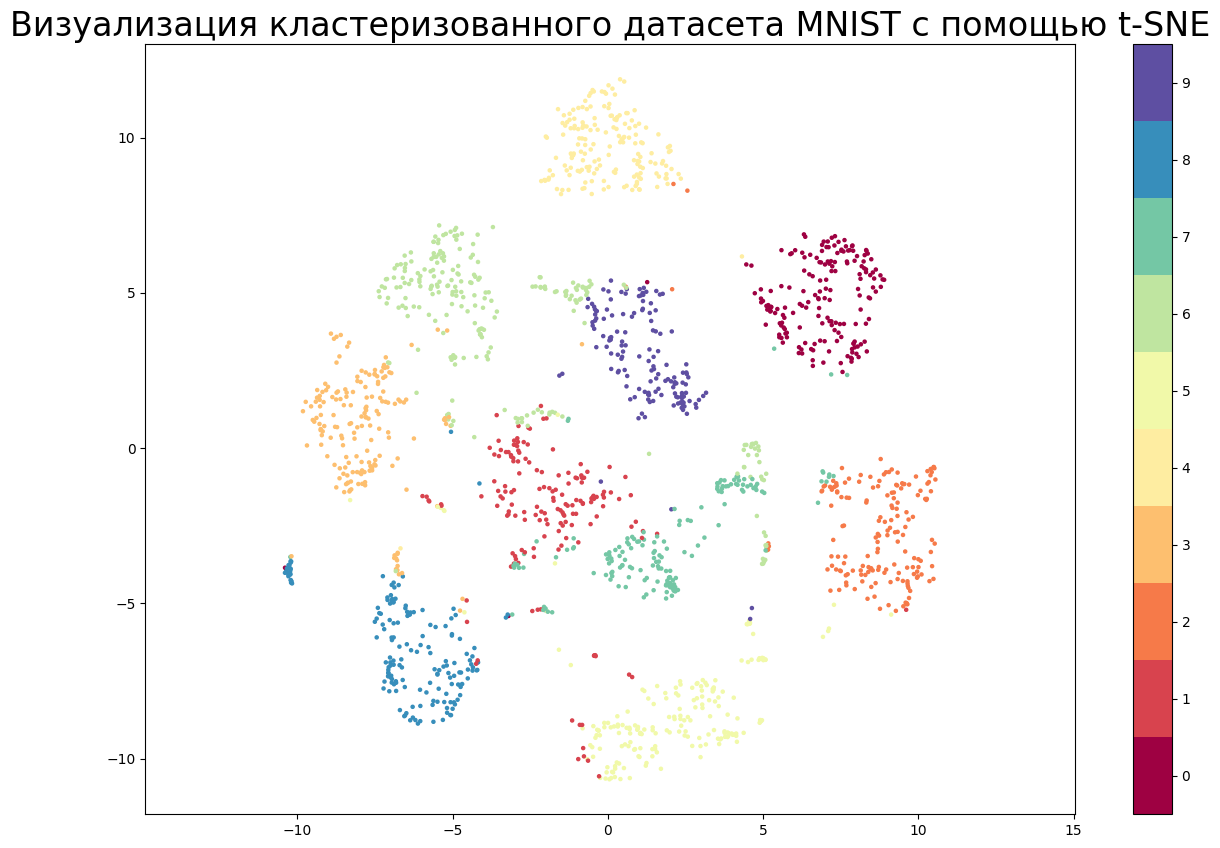

In [ ]:
plt.figure(figsize=(15,10))

plt.scatter(tsne[:, 0], tsne[:, 1], s= 5, c=kmeans_best.labels_, cmap='Spectral')
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('Визуализация кластеризованного датасета MNIST с помощью t-SNE', fontsize=24);

## 3. Задание 3. DBSCAN.

1. Выберите из набора MNIST только те данные, которые соответствуют цифрам 6 и 8.
2. Проведите кластеризацию с использованием DBSCAN, подберите параметр алгоритма (eps), дающий лучшее значение метрики homogenity_score.
3. Проведите кластеризацию на 2 кластера с помощью K-Means. Подберите параметры алгоритма, дающие лучшее значение homogenity_score.
4. Проведите визуализацию работы DBSCAN и K-Means с помощью t-SNE.
5. Сделайте вывод, какой алгоритм в данном случае построил лучшие кластеры. Предположите, почему так произошло.

Далее необходимо добавить ячейки с кодом и текстовым описанием всех действий, которые выполняются.

***Вставьте свой код и текстовое описание в ячейки ниже***

In [ ]:
#выберем только цифры 6 и 8
ind = np.where((y == 6 ) | (y == 8))
X_pair, y_pair = X[ind], y[ind]

In [ ]:
#стадартизуем данные
pair_standardized=StandardScaler().fit_transform(X_pair)

In [ ]:
from sklearn.cluster import DBSCAN

#подберём парамтр для кластеризации при помощи DBSCAN
search={}
for eps in [0.5, 1, 2, 5, 5.5, 7, 10, 12]:
  dbscan=DBSCAN(eps=eps).fit(pair_standardized)
  score=homogeneity_score(y_pair, dbscan.labels_)
  search[f'eps={eps}']=score


best_param=max(search, key=search.get)
print(f'{best_param}, scoring={search[best_param]}')

eps=5.5, scoring=0.849981013660729


Визуализируем результат DBSCAN

In [ ]:
#кластеризуем с наилучшим параметром
dbscan_best=DBSCAN(eps=5.5).fit(pair_standardized)

#сведём к размерности 2
tsne_pair=TSNE(random_state = 42, n_components=2,verbose=0, perplexity=40, n_iter=300).fit_transform(pair_standardized)

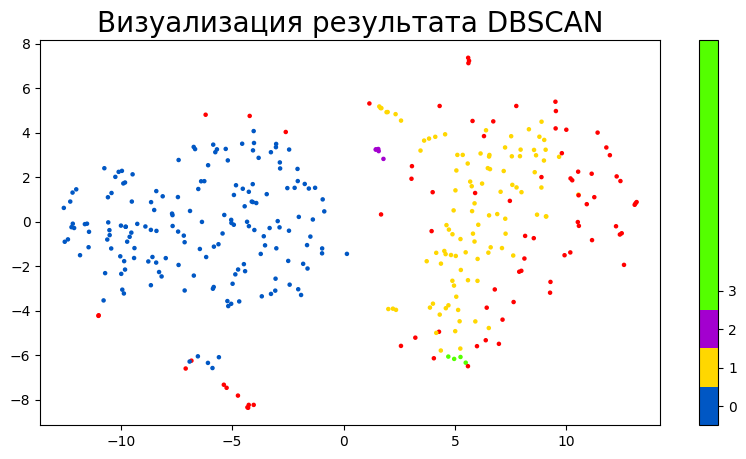

In [ ]:
#визуализируем
plt.figure(figsize=(10,5))

plt.scatter(tsne_pair[:, 0], tsne_pair[:, 1], s= 5, c=dbscan_best.labels_, cmap='prism')
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(4))
plt.title('Визуализация результата DBSCAN', fontsize=20);

In [ ]:
#подберём параметры для кластеризации с помощью KMeans
search_kmeans={}
for init in ['k-means++', 'random']:
  for n_init in [1, 10, 12, 15]:
    for max_iter in [50, 100, 200, 300]:
      for random_state in [None, 0, 42]:
        for algorithm in ['lloyd', 'elkan']:
          kmeans=KMeans(n_clusters=2, init=init, n_init=n_init, max_iter=max_iter, algorithm=algorithm, random_state=random_state).fit(pair_standardized)
          score=homogeneity_score(y_pair, kmeans.labels_)
          search_kmeans[f'init={init}, n_init={n_init}, max_iter={max_iter}, algorithm={algorithm}, random_state={random_state}']=score


best_param=max(search_kmeans, key=search_kmeans.get)
print(f'{best_param}, scoring={search_kmeans[best_param]}')

init=k-means++, n_init=1, max_iter=100, algorithm=elkan, random_state=None, scoring=0.9302389886095651


Теперь визуализируем результат кластеризации при помощи KMeans

In [ ]:
#кластеризуем с наилучшим параметром
kmeans_best_pair=KMeans(n_clusters=2, init='k-means++', n_init=1, max_iter=100, algorithm='elkan', random_state=None).fit(pair_standardized)

Text(0.5, 1.0, 'Визуализация результата KMeans')

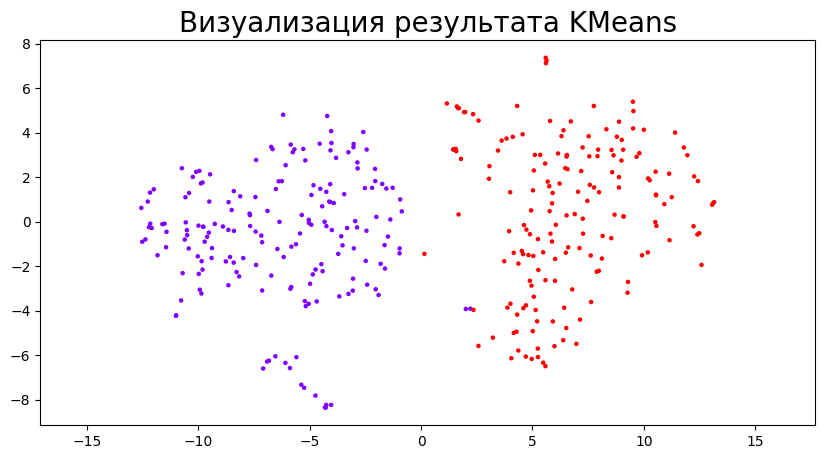

In [ ]:
#визуализируем
plt.figure(figsize=(10,5))

plt.scatter(tsne_pair[:, 0], tsne_pair[:, 1], s= 5, c=kmeans_best_pair.labels_, cmap='rainbow')
plt.gca().set_aspect('equal', 'datalim')
plt.title('Визуализация результата KMeans', fontsize=20)

Очевидно, что лучше работает в этом случае метод кластеризации KMeans. Вероятно, потому что есть области с низкой плотностью данных, поэтму DBSCAN многое определяет, как выбросы. При этом точки могут быть достугнуты из разных, по мнению DBSCAN, кластеров, поэтому он определяет их в какой-то случайным образом